<a href="https://colab.research.google.com/github/rhodes-byu/cs-stat-180/blob/main/notebooks/15a-cross-validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import randint

sns.set(style = "darkgrid")

c:\Users\rhodes8\AppData\Local\miniconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### **Loading a Dataset**

In [2]:
data = datasets.load_breast_cancer() # Pick a dataset: iris, wine, breast_cancer
print(data.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
X = data.data  # Features
y = data.target  # Labels

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### **Data Summary**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

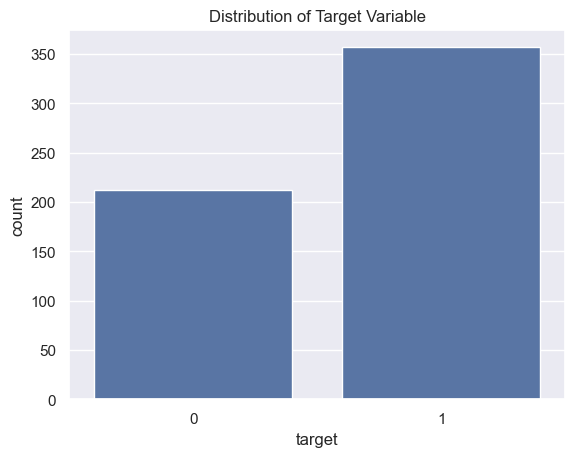

In [5]:
print(df.info())

# Check if the target variable is balanced
target_counts = df['target'].value_counts()
print(target_counts)

# Plot the distribution of the target variable
sns.countplot(x = 'target', data = df)
plt.title('Distribution of Target Variable')
plt.show()



### **Splitting Data into Training and Testing Sets**

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (455, 30)
Testing data shape: (114, 30)


### **Training and Evaluating a K-Nearest Neighbors (KNN) Classifier**

In [7]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### **Cross-Validation**

In [8]:
# Perform 5-fold cross-validation for each model
scores = cross_val_score(knn, X, y, cv=5, scoring = 'f1_weighted')
print(f"{knn} Cross-Validation Score: {scores.mean():.2f} ± {scores.std():.2f}")

KNeighborsClassifier() Cross-Validation Score: 0.93 ± 0.02


### **Hyperparameter Tuning**: GridSearchCV

In [9]:
# Example: Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best cross-validation score for KNN:", grid_knn.best_score_)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score for KNN: 0.9406593406593406


In [10]:
# Test on the test set
best_knn = grid_knn.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test)
print("Test accuracy for best KNN model:", accuracy_score(y_test, y_pred_knn_tuned))

Test accuracy for best KNN model: 0.9385964912280702


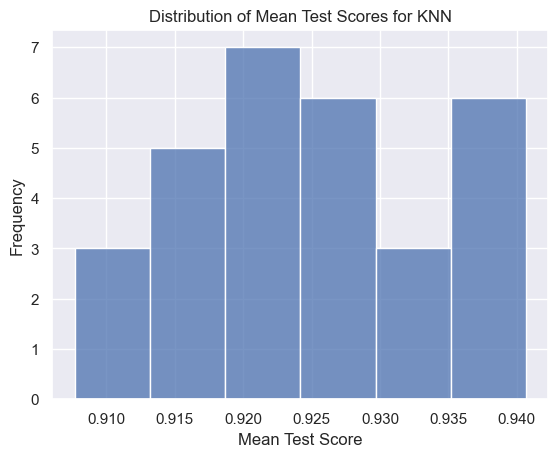

In [11]:
sns.histplot(grid_knn.cv_results_['mean_test_score'])
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Test Scores for KNN')
plt.show()

### **Visualizing Hyperparameter Search Results**

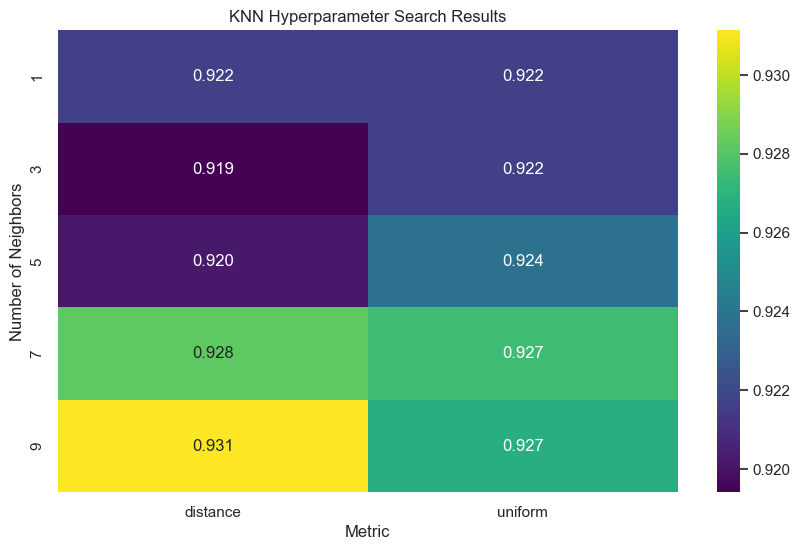

In [13]:
# Visualize GridSearchCV results for KNN
results_knn = pd.DataFrame(grid_knn.cv_results_)
results_knn_pivot = results_knn.pivot_table(index='param_n_neighbors',
                                            columns='param_weights', 
                                            values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(
    results_knn_pivot,
    annot=True, fmt=".3f", cmap="viridis"
)
plt.title("KNN Hyperparameter Search Results")
plt.ylabel("Number of Neighbors")
plt.xlabel("Metric")
plt.show()